# Answer Key for HW02: Generating core data visualizations on the Central Park weather dataset in Python

## ⚠️⚠️⚠️ TOTAL POINTS POSSIBLE: 42 ⚠️⚠️⚠️

- 3 pts each for the nine 3x1 plots and the five scatterplots
  - 2 pts for the plots themselves
  - 1 pt for the descriptions

## Preliminaries

### Import needed python packages

In [1]:
from matplotlib import pyplot as plt  # for plotting
import numpy as np # for working with arrays of numerical values
import xarray as xr  # for loading data and subsequent analyses

### Load the Central Park data

In [2]:
!pip install pooch

# The above command installs the needed `pooch` 3rd-party package if it's not already installed.


import hashlib  # for verifying that the Central Park file is not corrupted
import pathlib  # for constructing paths to the dataset's location on disk
import sys  # for checking if this is a Google Colab session or not
import pooch  # for downloading the dataset from the web, if needed


# Replace "../data" as needed to point to the correct directory for you.
# This can be an *absolute path* or a *relative path*.  One dot, `.`, means
# "this directory", while two dots, `..`, means "go up one directory."
LOCAL_DATA_DIR = "../data"  # If you're in Colab: just ignore this.

# The URL where the dataset can be downloaded from.
DATA_URL = (
    "https://spencerahill.github.io/25f-stat-methods-course/_downloads/"
    "91803b82950d49961a65355c075439b3/central-park-station-data_1869-01-01_2023-09-30.nc"
)

# This HASH_HEX stores a "hash" which we use to verify that the data you end up
# with has not been altered or corrupted compared to the one at the above URL.
HASH_HEX = "85237a4bae1202030a36f330764fd5bd0c2c4fa484b3ae34a05db49fe7721eee"


def create_data_path(
    colab_dir="/content/data", 
    local_dir=LOCAL_DATA_DIR,
    filename="central-park-station-data_1869-01-01_2023-09-30.nc",
):
    """Set the path for the data, whether on colab or a local Jupyter session."""
    is_this_a_colab = "google.colab" in sys.modules
    if is_this_a_colab:
        data_dir = colab_dir 
    else: 
        data_dir = local_dir

    DATA_DIR = pathlib.Path(data_dir)
    DATA_DIR.mkdir(parents=True, exist_ok=True)
    return DATA_DIR / filename


def sha256sum(path: pathlib.Path) -> str:
    """Get the hash of the file at the specified path."""
    return hashlib.sha256(path.read_bytes()).hexdigest()


DATA_PATH = create_data_path()
# Determine if we'll need to download the data, which we'll do if either (a) 
# the data can't be found, or (b) it appears corrupted/modified from the
# "master" file at the above URL.
need_fetch = (not DATA_PATH.exists()) or (sha256sum(DATA_PATH) != HASH_HEX)

# Download the data if needed.
if need_fetch:
    fetched_data = pooch.retrieve(
        url=DATA_URL, 
        known_hash=f"sha256:{HASH_HEX}",
        path=DATA_PATH.parents[0], 
        fname=DATA_PATH.name,
    )
    print(f"\nDownloaded and verified: {fetched_data}")
else:
    print(f"\nVerified existing file at {DATA_PATH}")

Looking in links: https://pypi.python.org/pypi, https://testpypi.python.org/pypi

Verified existing file at ../data/central-park-station-data_1869-01-01_2023-09-30.nc


In [3]:
import xarray as xr

# `DATA_PATH` variable was created by the hidden cell just above. 
# Un-hide that cell if you want to see the details.
ds_cp = xr.open_dataset(DATA_PATH)
ds_cp

<xarray.Dataset> Size: 5MB
Dimensions:        (time: 56520)
Coordinates:
  * time           (time) datetime64[ns] 452kB 1869-01-01 ... 2023-09-30
Data variables:
    temp_max       (time) int64 452kB ...
    temp_min       (time) int64 452kB ...
    temp_avg       (time) float64 452kB ...
    temp_anom      (time) float64 452kB ...
    heat_deg_days  (time) int64 452kB ...
    cool_deg_days  (time) int64 452kB ...
    precip         (time) float64 452kB ...
    snow_fall      (time) float64 452kB ...
    snow_depth     (time) int64 452kB ...

## Introduction

We learned four key plot types: **timeseries**, **box-and-whisker**, **histogram**, and **scatterplot**.  This included both what they represent/how to interpret them *and* how to plot them in a Jupyter notebook using matplotlib and numpy.  We also learned how to read in netCDF files from disk---such as the Central Park weather station dataset---using the `xarray` package.

In this assignment, you'll generate these plots for other variables in that dataset.

## Your specific tasks

### Histogram, box-and-whisker, and timeseries for the Central Park weather station variables

For **three** of the following variables *of your choice* in the Central Park daily weather dataset...
- `temp_avg` (daily average temperature)
- `temp_min` (daily minimum temperature)
- `temp_max` (daily maximum temperature)
- `temp_anom` (daily average temperature *departure* from "normal", i.e. a 30-year average)
- `heat_deg_days` ([heating degree days](https://en.wikipedia.org/wiki/Heating_degree_day))
- `cool_deg_days` ([cooling degree days](https://en.wikipedia.org/wiki/Degree_day#United_States))
- `precip` (precipitation in inches; when it's snow this is [*snow water equivalent*](https://en.wikipedia.org/wiki/Snow_science#Measurement))
- `snow_fall` (snowfall in inches that day)
- `snow_depth` (depth in inches of snow currently on the ground)

...complete **all** of the following tasks:

- [ ] Create a 1x3 figure (meaning 1 row by 3 columns)
- [ ] Be sure to properly label the x and y axes in each case: identify the physical quantity and the units.
- [ ] As a text ("markdown") cell above the figure, include a 1 or 2 sentence description of what the quantity is.
- [ ] As a Markdown cell below the figure, for each of the 3 plots, include a 1 or 2 sentence description: the overall behavior and anything else that seems noteworthy.

### Make selected scatterplots

For **each** of the following pairs of fields:

- `temp_min` vs. `temp_max`
- `temp_avg` vs. `cool_deg_days`
- `snow_fall` vs. `precip`
- `temp_avg` vs. `temp_avg` 2 weeks later
- `temp_anom` vs. `temp_anom` 2 weeks later

...do the following:
- [ ] generate a scatterplot
- [ ] Include a markdown cell immediately after with 1-2 sentences describing the overall behavior and anything else noteworthy you see.  

### ⚠️ POINTS: 42

- 3 pts each for the nine 3x1 plots and the five scatterplots
  - 2 pts for the plots themselves
  - 1 pt for the descriptions

## ✅ ANSWERS: 3x1 plots

### Daily Average Temperature
The quantity displayed on the plots below is daily average temperature recorded at a weather station in Central Park from 1869 to 2023. Daily average temperature is calculated by getting the average of all temperature values recorded in one day.

<Figure size 640x480 with 0 Axes>

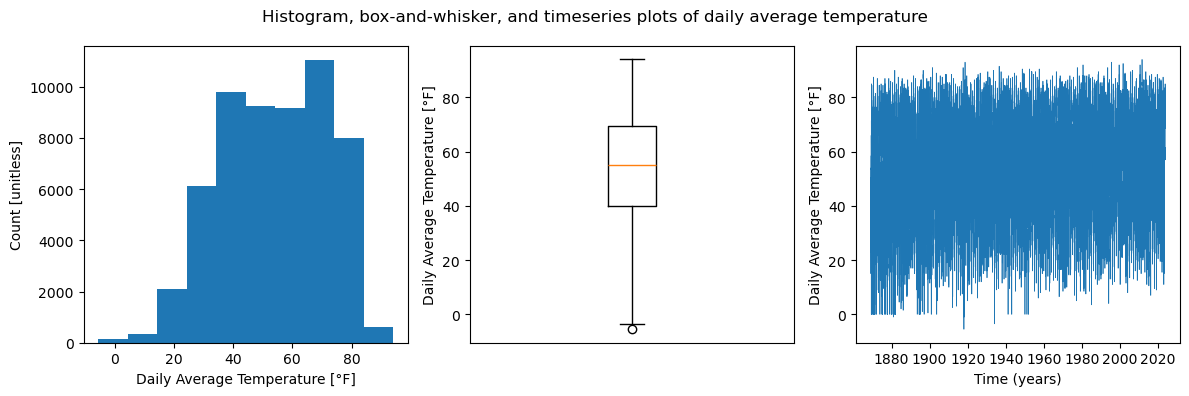

In [4]:
# Plot 3x1 figure for temp_avg (daily average temperature)

fig = plt.figure()  # Create a matplotlib.Figure instance

fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # Create a figure containting 1x3 array of axes

ax = axarr[0]
ax.hist(ds_cp["temp_avg"])
ax.set_xlabel("Daily Average Temperature [°F]")  # First plot, a histogram
ax.set_ylabel("Count [unitless]")

ax = axarr[1]
ax.boxplot(ds_cp["temp_avg"])  # Second plot, a box and whisker plot
ax.set_xticks([])
ax.set_ylabel("Daily Average Temperature [°F]")

ax = axarr[2]
ax.plot(ds_cp["time"], ds_cp["temp_avg"], linewidth=0.5)   # Third plot, a timeseries plot
ax.set_xlabel("Time (years)")
ax.set_ylabel("Daily Average Temperature [°F]")

fig.suptitle("Histogram, box-and-whisker, and timeseries plots of daily average temperature")

fig.tight_layout()  # Maintain comfortable space between subplots

The timeseries plot of daily average temperature in Central Park from 1869 to 2023 displays a relatively stable overall trend with few fluctuations over the years (note that some very obvious fluctuations are due to erroneous zero values). The histogram is slightly bimodal, with peaks at around 40°F and 75°F, while the box and whisker plot shows that the middle 50% of the daily average temperature dataset is in the approximate range of 40-70°F.

### Daily Minimum Temperature
The quantity displayed on the plots below is daily minimum temperature recorded at a weather station in Central Park from 1869 to 2023. Daily minimum temperature is defined as the smallest temperature value out of all temperature values recorded in one day.

<Figure size 640x480 with 0 Axes>

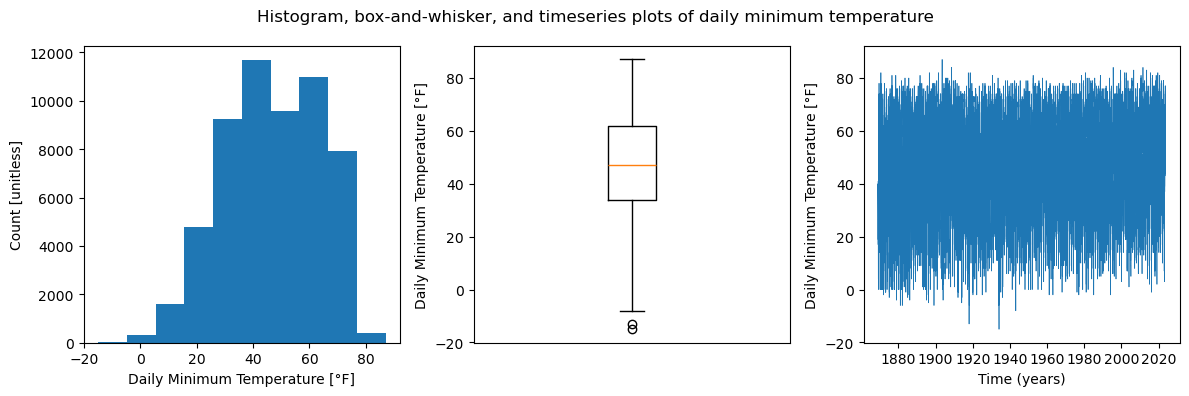

In [5]:
# Plot 3x1 figure for temp_min (daily minimum temperature)

fig = plt.figure()  # Create a matplotlib.Figure instance

fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # Create a figure containting 1x3 array of axes

ax = axarr[0]
ax.hist(ds_cp["temp_min"])
ax.set_xlabel("Daily Minimum Temperature [°F]")  # First plot, a histogram
ax.set_ylabel("Count [unitless]")

ax = axarr[1]
ax.boxplot(ds_cp["temp_min"])  # Second plot, a box and whisker plot
ax.set_xticks([])
ax.set_ylabel("Daily Minimum Temperature [°F]")

ax = axarr[2]
ax.plot(ds_cp["time"], ds_cp["temp_min"], linewidth=0.5)   # Third plot, a timeseries plot
ax.set_xlabel("Time (years)")
ax.set_ylabel("Daily Minimum Temperature [°F]")

fig.suptitle("Histogram, box-and-whisker, and timeseries plots of daily minimum temperature")

fig.tight_layout()  # Maintain comfortable space between subplots

The timeseries plot of daily minimum temperature in Central Park from 1869 to 2023 displays a relatively stable overall trend with few fluctuations over the years. The histogram is bimodal, with peaks at around 40°F and 65°F, while the box and whisker plot shows that the middle 50% of the minimum temperature dataset is in the approximate range of 30-60°F.

### Daily Maximum Temperature
The quantity displayed on the plots below is daily maximum temperature recorded at a weather station in Central Park from 1869 to 2023. Daily maximum temperature is defined as the largest temperature value out of all temperature values recorded in one day.

<Figure size 640x480 with 0 Axes>

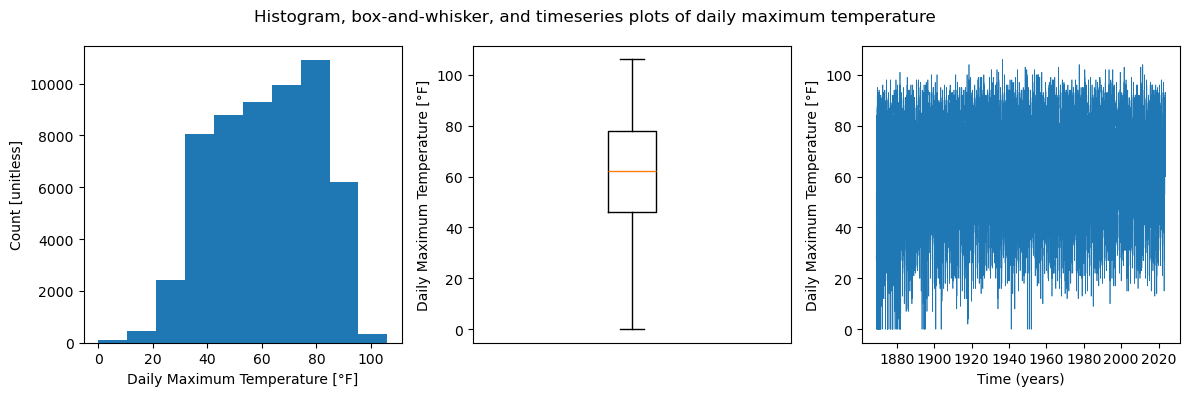

In [6]:
# Plot 3x1 figure for temp_max (daily maximum temperature)

fig = plt.figure()  # Create a matplotlib.Figure instance

fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # Create a figure containting 1x3 array of axes

ax = axarr[0]
ax.hist(ds_cp["temp_max"])
ax.set_xlabel("Daily Maximum Temperature [°F]")  # First plot, a histogram
ax.set_ylabel("Count [unitless]")

ax = axarr[1]
ax.boxplot(ds_cp["temp_max"])  # Second plot, a box and whisker plot
ax.set_xticks([])
ax.set_ylabel("Daily Maximum Temperature [°F]")

ax = axarr[2]
ax.plot(ds_cp["time"], ds_cp["temp_max"], linewidth=0.5)   # Third plot, a timeseries plot
ax.set_xlabel("Time (years)")
ax.set_ylabel("Daily Maximum Temperature [°F]")

fig.suptitle("Histogram, box-and-whisker, and timeseries plots of daily maximum temperature")

fig.tight_layout()  # Maintain comfortable space between subplots

The timeseries plot of daily maximum temperature in Central Park from 1869 to 2023 displays a relatively stable overall trend with few fluctuations over the years (note that some very obvious fluctuations are due to erroneous zero values). The histogram is unimodal and slightly skewed left, with a peak at around 80°F, while the box and whisker plot shows that the middle 50% of the maximum temperature dataset is in the approximate range of 45-80°F.

### Daily Average Temperature Departure from Normal
The quantity displayed on the plots below is daily average temperature departure from normal, recorded at a weather station in Central Park from 1869 to 2023. Daily average temperature departure from normal refers to the difference between the daily average temperature for a day and the historical average temperature for that same day of the year. It basically conveys whether the temperature on a particular day was higher or lower than what is typically expected for that date based on historical data.

<Figure size 640x480 with 0 Axes>

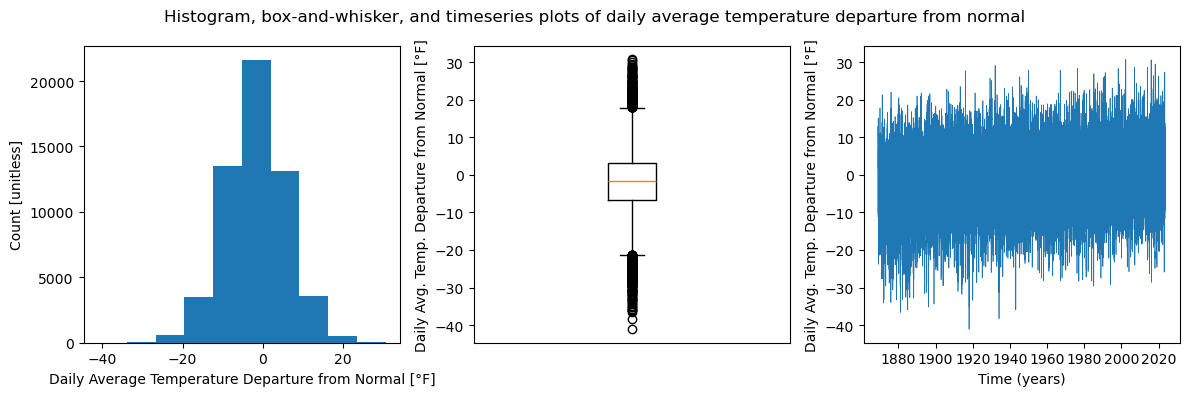

In [7]:
# Plot 3x1 figure for temp_anom (daily average temperature departure from normal)

fig = plt.figure()  # Create a matplotlib.Figure instance

fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # Create a figure containting 1x3 array of axes

ax = axarr[0]
ax.hist(ds_cp["temp_anom"])
ax.set_xlabel("Daily Average Temperature Departure from Normal [°F]")  # First plot, a histogram
ax.set_ylabel("Count [unitless]")

ax = axarr[1]
ax.boxplot(ds_cp["temp_anom"])  # Second plot, a box and whisker plot
ax.set_xticks([])
ax.set_ylabel("Daily Avg. Temp. Departure from Normal [°F]")

ax = axarr[2]
ax.plot(ds_cp["time"], ds_cp["temp_anom"], linewidth=0.5)   # Third plot, a timeseries plot
ax.set_xlabel("Time (years)")
ax.set_ylabel("Daily Avg. Temp. Departure from Normal [°F]")

fig.suptitle("Histogram, box-and-whisker, and timeseries plots of daily average temperature departure from normal")

fig.tight_layout()  # Maintain comfortable space between subplots

The timeseries plot of daily average temperature departure from normal in Central Park from 1869 to 2023 displays a relatively stable (perhaps slightly upward) overall trend with few fluctuations over the years. The histogram is unimodal and normally-distributed, with a peak at around 0°F, while the box and whisker plot shows that the middle 50% of the temp_anom dataset is in the approximate range of -5 to 5°F.

### Heating Degree Days
The quantity displayed on the plots below is heating degree days recorded at a weather station in Central Park from 1869 to 2023. Heating degree days (HDD) for a specific day is defined as the difference between a certain base temperature (typically 65°F) and the daily average temperature of that day, given the daily average temperature is smaller than the base temperature (if larger, HDD is zero). HDD is a measure often used for estimating heating energy consumption, as a period of time with higher HDD indicates cooler weather than base, and higher energy levels needed for heating.

<Figure size 640x480 with 0 Axes>

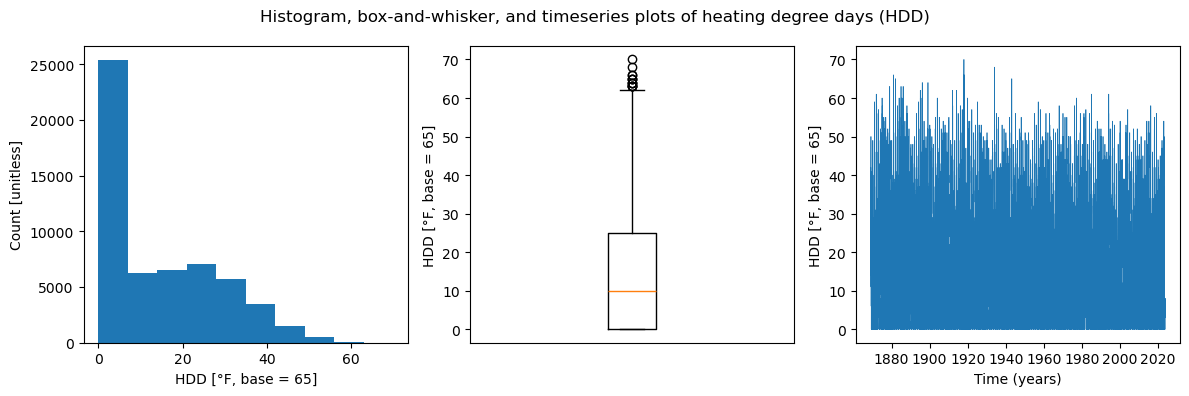

In [8]:
# Plot 3x1 figure for heat_deg_days (heating degree days)

fig = plt.figure()  # Create a matplotlib.Figure instance

fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # Create a figure containting 1x3 array of axes

ax = axarr[0]
ax.hist(ds_cp["heat_deg_days"])
ax.set_xlabel("HDD [°F, base = 65]")  # First plot, a histogram
ax.set_ylabel("Count [unitless]")

ax = axarr[1]
ax.boxplot(ds_cp["heat_deg_days"])  # Second plot, a box and whisker plot
ax.set_xticks([])
ax.set_ylabel("HDD [°F, base = 65]")

ax = axarr[2]
ax.plot(ds_cp["time"], ds_cp["heat_deg_days"], linewidth=0.5)   # Third plot, a timeseries plot
ax.set_xlabel("Time (years)")
ax.set_ylabel("HDD [°F, base = 65]")

fig.suptitle("Histogram, box-and-whisker, and timeseries plots of heating degree days (HDD)")

fig.tight_layout()  # Maintain comfortable space between subplots

The timeseries plot of HDD in Central Park from 1869 to 2023 displays a relatively stable (perhaps slightly downward) overall trend with few fluctuations over the years. The histogram is unimodal and right skewed, with a peak at 0°F, while the box and whisker plot shows that the middle 50% of the HDD dataset is in the approximate range of 0-25°F.

### Cooling Degree Days
The quantity displayed on the plots below is cooling degree days recorded at a weather station in Central Park from 1869 to 2023. Cooling degree days (CDD) for a specific day is defined as the difference between the daily average temperature of that day and a certain base temperature (typically 65°F), given the daily average temperature is larger than the base temperature (if smaller, CDD is zero). CDD is a measure often used for estimating cooling energy consumption, as a period of time with higher CDD indicates hotter weather than base, and higher energy levels needed for cooling.

<Figure size 640x480 with 0 Axes>

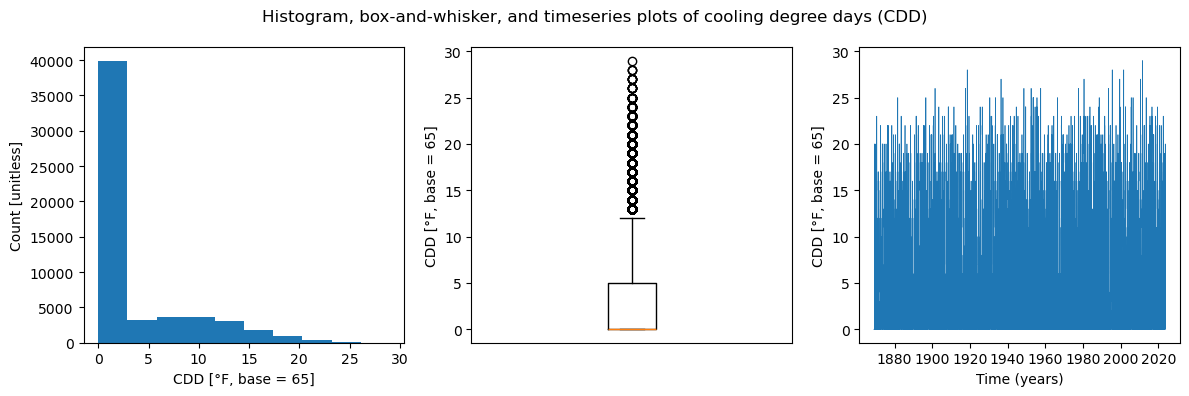

In [9]:
# Plot 3x1 figure for cool_deg_days (cooling degree days)

fig = plt.figure()  # Create a matplotlib.Figure instance

fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # Create a figure containting 1x3 array of axes

ax = axarr[0]
ax.hist(ds_cp["cool_deg_days"])
ax.set_xlabel("CDD [°F, base = 65]")  # First plot, a histogram
ax.set_ylabel("Count [unitless]")

ax = axarr[1]
ax.boxplot(ds_cp["cool_deg_days"])  # Second plot, a box and whisker plot
ax.set_xticks([])
ax.set_ylabel("CDD [°F, base = 65]")

ax = axarr[2]
ax.plot(ds_cp["time"], ds_cp["cool_deg_days"], linewidth=0.5)   # Third plot, a timeseries plot
ax.set_xlabel("Time (years)")
ax.set_ylabel("CDD [°F, base = 65]")

fig.suptitle("Histogram, box-and-whisker, and timeseries plots of cooling degree days (CDD)")

fig.tight_layout()  # Maintain comfortable space between subplots

The timeseries plot of CDD in Central Park from 1869 to 2023 displays a relatively stable overall trend with few fluctuations over the years. The histogram is unimodal and right skewed, with a peak at 0°F, while the box and whisker plot shows that the lower 75% of the CDD dataset is in the approximate range of 0-5°F, and at least 50% of the data points equal 0°F (since minimum and median value are both 0).

### Precipitation
The quantity displayed on the plots below is precipitation recorded at a weather station in Central Park from 1869 to 2023. Precipitation in a day is defined as the amount of rain and/or snow that falls over a location and is recorded in one day, often measured in inches. 

<Figure size 640x480 with 0 Axes>

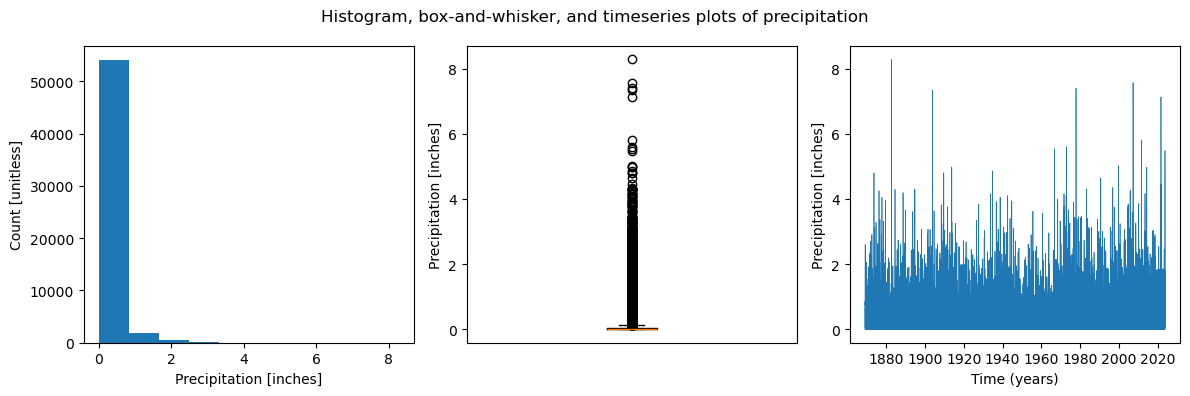

In [10]:
# Plot 3x1 figure for precip (precipitation)

fig = plt.figure()  # Create a matplotlib.Figure instance

fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # Create a figure containting 1x3 array of axes

ax = axarr[0]
ax.hist(ds_cp["precip"])
ax.set_xlabel("Precipitation [inches]")  # First plot, a histogram
ax.set_ylabel("Count [unitless]")

ax = axarr[1]
ax.boxplot(ds_cp["precip"])  # Second plot, a box and whisker plot
ax.set_xticks([])
ax.set_ylabel("Precipitation [inches]")

ax = axarr[2]
ax.plot(ds_cp["time"], ds_cp["precip"], linewidth=0.5)   # Third plot, a timeseries plot
ax.set_xlabel("Time (years)")
ax.set_ylabel("Precipitation [inches]")

fig.suptitle("Histogram, box-and-whisker, and timeseries plots of precipitation")

fig.tight_layout()  # Maintain comfortable space between subplots

The timeseries plot of precipitation in Central Park from 1869 to 2023 displays an overall trend of precipitation staying within 0 and 2 inches, with some noticeable fluctuations over the years, likely attributed to occasional storms in the Central Park area. The histogram shows an overwhelming majority of precipitation values at 0 inches, while the box and whisker plot shows that all values above ~0.1 inches are outliers due to the large amount of precipitation values at 0.

### Snowfall
The quantity displayed on the plots below is snowfall recorded at a weather station in Central Park from 1869 to 2023. Snowfall in a day is defined as the amount of snow that falls over a location and is recorded in one day, often measured in inches. 

<Figure size 640x480 with 0 Axes>

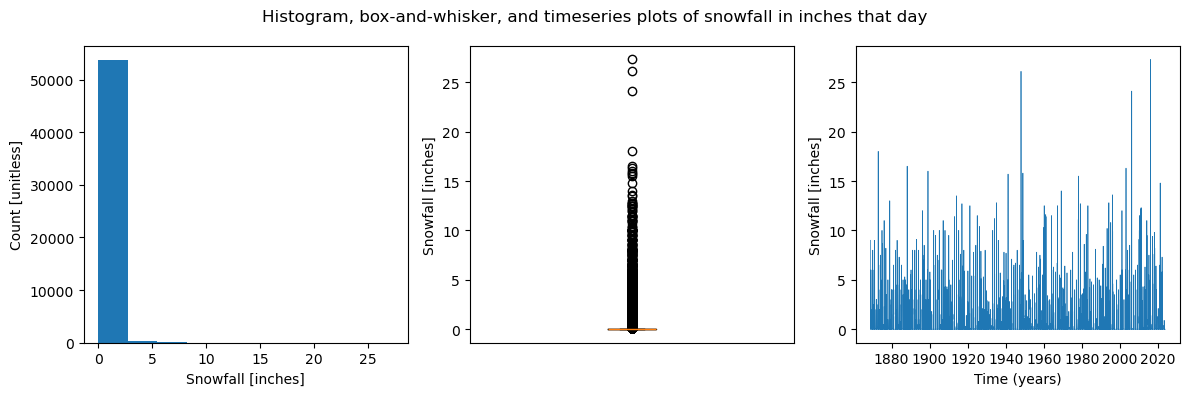

In [11]:
# Plot 3x1 figure for snow_fall (snowfall)

ds_cp_1 = ds_cp.dropna(dim='time', subset=['snow_fall'])   # Drop NaN values in snow_fall

fig = plt.figure()  # Create a matplotlib.Figure instance

fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # Create a figure containting 1x3 array of axes

ax = axarr[0]
ax.hist(ds_cp_1["snow_fall"])
ax.set_xlabel("Snowfall [inches]")  # First plot, a histogram
ax.set_ylabel("Count [unitless]")

ax = axarr[1]
ax.boxplot(ds_cp_1["snow_fall"])  # Second plot, a box and whisker plot
ax.set_xticks([])
ax.set_ylabel("Snowfall [inches]")

ax = axarr[2]
ax.plot(ds_cp_1["time"], ds_cp_1["snow_fall"], linewidth=0.5)   # Third plot, a timeseries plot
ax.set_xlabel("Time (years)")
ax.set_ylabel("Snowfall [inches]")

fig.suptitle("Histogram, box-and-whisker, and timeseries plots of snowfall in inches that day")

fig.tight_layout()  # Maintain comfortable space between subplots

The timeseries plot of snowfall in Central Park from 1869 to 2023 displays an overall trend of snowfall at around 0 inches with noticeable fluctuations over the years, likely attributed to occasional snowstorms in the Central Park area. The histogram shows an overwhelming majority of snowfall values at 0 inches, while the box and whisker plot shows that all values above 0 inches are outliers due to the large amount of snowfall values at 0.

### Snow Depth
The quantity displayed on the plots below is snow depth recorded at a weather station in Central Park from 1869 to 2023. Snow depth in a day is defined as the total accumulation of snow on the ground in one day, often measured in inches. 

<Figure size 640x480 with 0 Axes>

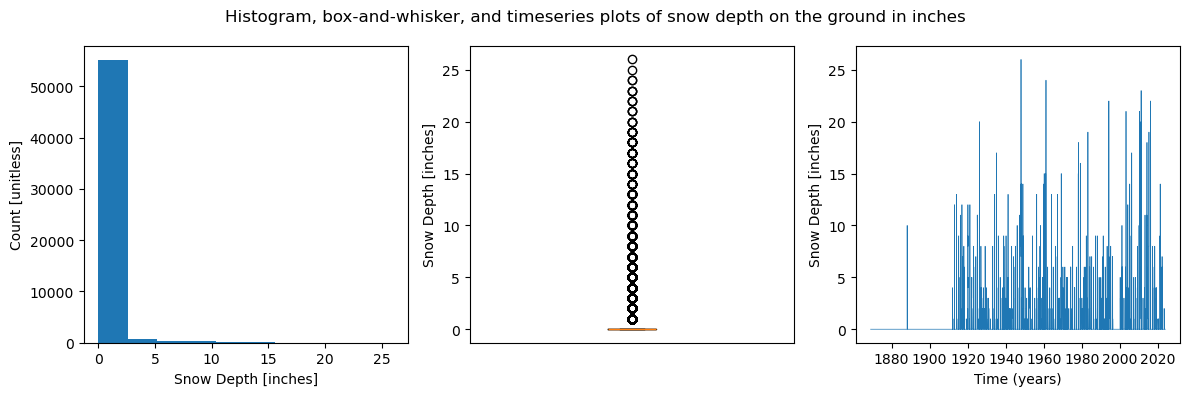

In [12]:
# Plot 3x1 figure for snow_depth (snow depth)

fig = plt.figure()  # Create a matplotlib.Figure instance

fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # Create a figure containting 1x3 array of axes

ax = axarr[0]
ax.hist(ds_cp["snow_depth"])
ax.set_xlabel("Snow Depth [inches]")  # First plot, a histogram
ax.set_ylabel("Count [unitless]")

ax = axarr[1]
ax.boxplot(ds_cp["snow_depth"])  # Second plot, a box and whisker plot
ax.set_xticks([])
ax.set_ylabel("Snow Depth [inches]")

ax = axarr[2]
ax.plot(ds_cp["time"], ds_cp["snow_depth"], linewidth=0.5)   # Third plot, a timeseries plot
ax.set_xlabel("Time (years)")
ax.set_ylabel("Snow Depth [inches]")

fig.suptitle("Histogram, box-and-whisker, and timeseries plots of snow depth on the ground in inches")

fig.tight_layout()  # Maintain comfortable space between subplots

The timeseries plot of snow depth in Central Park from 1869 to 2023 displays an overall trend of snow depth at around 0 inches (though the period from 1869-1910 looks erroneous), with noticeable fluctuations over the years, likely attributed to occasional snowstorms in the Central Park area. The histogram shows an overwhelming majority of snow depth values at 0 inches, while the box and whisker plot shows that all values above 0 inches are outliers due to the large amount of snow depth values at 0.

## ✅ ANSWERS: scatterplots

### min vs max temp

Text(0.5, 1.0, 'Daily Minimum Temperature VS. Daily Maximum Temperature in Central Park, 1869-2023')

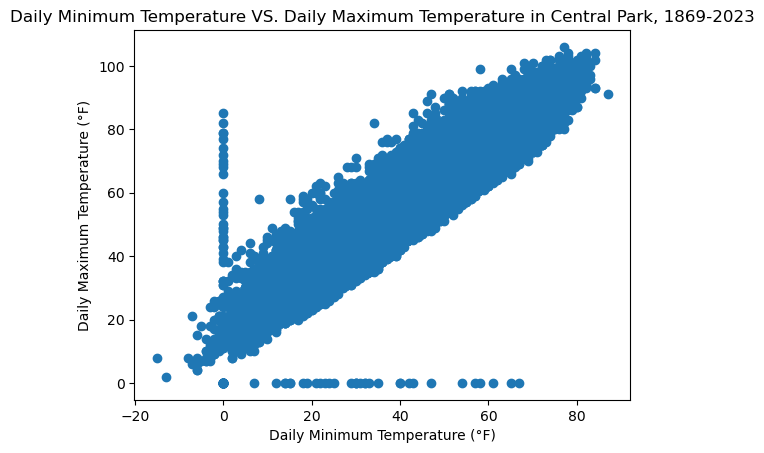

In [13]:
# Make scatterplot for temp_min vs. temp_max

plt.scatter(ds_cp["temp_min"], ds_cp["temp_max"])
plt.xlabel('Daily Minimum Temperature (°F)')
plt.ylabel('Daily Maximum Temperature (°F)')
plt.title('Daily Minimum Temperature VS. Daily Maximum Temperature in Central Park, 1869-2023')

Ignoring the clearly erroneous zero values for both variables, the relationship between daily minimum and daily maximum temperatures is a positive linear relationship, which means that if daily minimum temperature of a day increases, then the daily maximum temperature of a day will increase, too. This is likely because of the daily temperature ranges and patterns that we know of, where the temperature during the day (which is when the daily max. temp. would likely occur) is usually not too far off from the temperature during the night (which is when the daily min. temp. would likely occur). This is due to seasons, and how the temperatures throughout the entire day (including max. and min.) are generally on the hotter side during the summer, and on the cooler side during the winter. 

### CDD vs. daily mean temp

Text(0.5, 1.0, 'Daily Average Temperature VS. Cooling Degree Days in Central Park, 1869-2023')

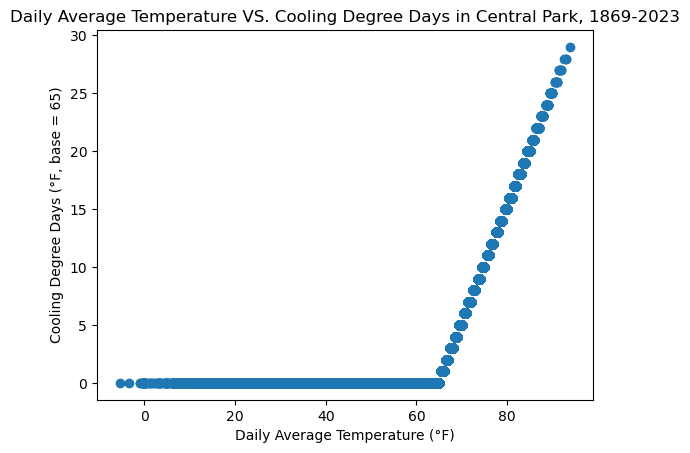

In [14]:
# Make scatterplot for temp_avg vs. cool_deg_days

plt.scatter(ds_cp["temp_avg"], ds_cp["cool_deg_days"])
plt.xlabel('Daily Average Temperature (°F)')
plt.ylabel('Cooling Degree Days (°F, base = 65)')
plt.title('Daily Average Temperature VS. Cooling Degree Days in Central Park, 1869-2023')

The relationship between daily average temperature and cooling degree days (CDD) is steadily linear once the daily average temperature is greater than the base temperature (65°F). Before this, CDD is equal to zero because there is no cooling needed when the temperature is already cool. Thus, the scatterplot above shows a line of zeros until the daily average temperature starts to increase above 65°F, where the CDD starts to increase linearly with the daily average temperature, since as it gets hotter, cooling needed increases.

### precip vs. snowfall

Text(0.5, 1.0, 'Daily Snowfall VS. Daily Precipitation in Central Park, 1869-2023')

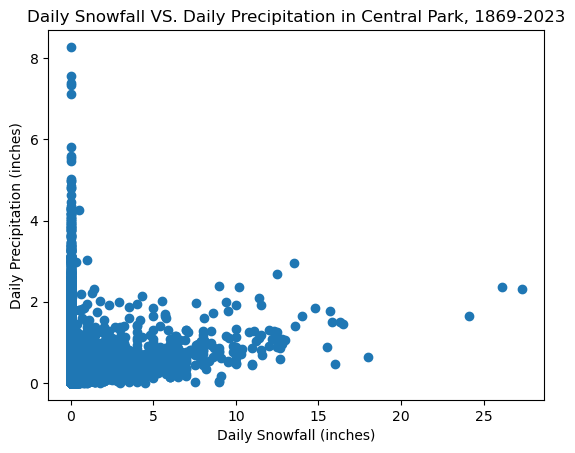

In [15]:
# Make scatterplot for snow_fall vs. precip

plt.scatter(ds_cp["snow_fall"], ds_cp["precip"])
plt.xlabel('Daily Snowfall (inches)')
plt.ylabel('Daily Precipitation (inches)')
plt.title('Daily Snowfall VS. Daily Precipitation in Central Park, 1869-2023')

This scatterplot does not show a clear relationship between the two variables, precipitation and snowfall. However, knowing that precipitation levels are made up of rain and snow water equivalent, we can see that when there is high snowfall, there is also precipitation. The opposite, however, is not true, because precipitation can occur even without any snowfall (i.e. rain), which  is depicted on the leftmost side of the scatterplot where snowfall = 0 and precipitation varies from 0 to 8 inches.

### mean temp vs. mean temp 2 weeks later

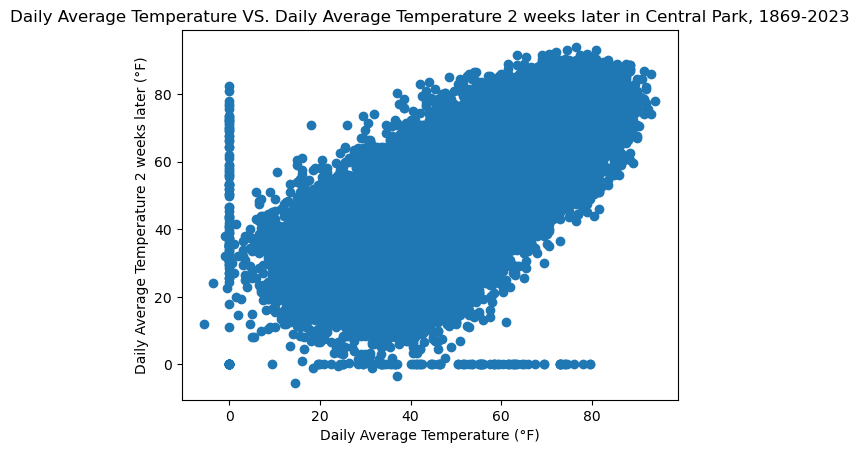

In [16]:
# Make scatterplot for temp_avg vs. temp_avg 2 weeks later

# Calculate the date two weeks later
two_weeks_later = ds_cp['time'] + np.timedelta64(14, 'D')  # 14 days = 2 weeks

# Drop last 2 weeks from two_weeks_later dataset (no temp values for those last 2 weeks)
max_date = ds_cp['time'].max()
two_weeks_later = two_weeks_later.where(two_weeks_later <= max_date, drop=True)

# Drop last 2 weeks from original temp_avg (two_weeks_later has no data for these 2 weeks)
temp_avg_original = ds_cp['temp_avg'].sel(time=slice(None, max_date - np.timedelta64(14, 'D')))

# Match temp_avg values with the corresponding dates in two_weeks_later
temp_avg_two_weeks_later = ds_cp['temp_avg'].sel(time=two_weeks_later)

# Create a scatterplot
plt.scatter(temp_avg_original, temp_avg_two_weeks_later)

# Add labels and a title
plt.xlabel('Daily Average Temperature (°F)')
plt.ylabel('Daily Average Temperature 2 weeks later (°F)')
plt.title('Daily Average Temperature VS. Daily Average Temperature 2 weeks later in Central Park, 1869-2023')

# Show the plot
plt.show()

Ignoring the clearly erroneous zero values for both variables, the relationship between daily average temperature (DAT) and daily average temperature 2 weeks later (DAT2) seems to be a weak, upwards-trending relationship. Generally, as DAT increases, DAT2 increases, and as DAT decreases, DAT2 decreases, too, but if a line is drawn vertically for each DAT value, it can be seen that there are many different DAT2 values that could occur 2 weeks after the DAT value, where DAT2 could be higher than, lower than, or even the same as DAT. However, there still does seem to be a positive linear relationship, but it is weak for the reason stated earlier. 

### temp anom vs temp anom 2 weeks later

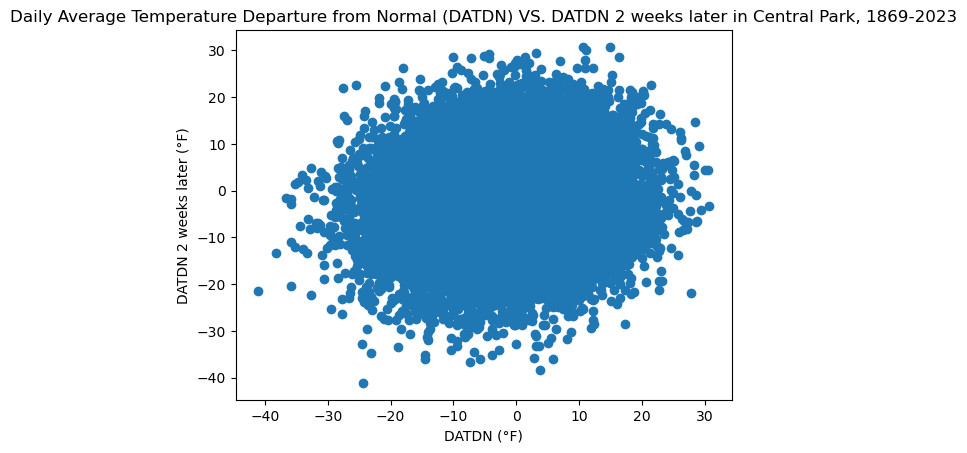

In [17]:
# Make scatterplot for temp_anom vs. temp_anom 2 weeks later

# Drop last 2 weeks from original temp_anom (two_weeks_later has no data for these 2 weeks)
temp_anom_original = ds_cp['temp_anom'].sel(time=slice(None, max_date - np.timedelta64(14, 'D')))

# Match temp_anom values with the corresponding dates in two_weeks_later
temp_anom_two_weeks_later = ds_cp['temp_anom'].sel(time=two_weeks_later)

# Create a scatterplot
plt.scatter(temp_anom_original, temp_anom_two_weeks_later)

# Add labels and a title
plt.xlabel('DATDN (°F)')
plt.ylabel('DATDN 2 weeks later (°F)')
plt.title('Daily Average Temperature Departure from Normal (DATDN) VS. DATDN 2 weeks later in Central Park, 1869-2023')

# Show the plot
plt.show()

The scatterplot does not show a clear relationship between DATDN and DATDN 2 weeks later, which suggests that DATDN on one day does not affect DATDN on a day 2 weeks later. Additionally, it can be seen that the DATDN on one day or DATDN on a day 2 weeks later typically does not go beyond the range -30 to 20°F, but within these ranges, almost every point seems to be fair game. This means that the DATDN on one day can be ANY value between -30 and 20°F and DATDN 2 weeks later could also be ANY value between -30 and 20°F, with (what seems like) no favored outcome among the possibilities.